# Notebook 3 - EDA

##### Alessandro DeChellis
##### Data Set: nhl_data.csv 

## Introduction

In this notebook, we will be using our newly cleaned data and begin to explore and visualize it to gain insights into our dataset. Our hope is to find trends in the data in order to make decisions about our future modelling based on it.

We also want to uncover potential relationships in the data.

In [176]:
## Import our packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import re
from math import exp
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

We first import the csv to our dataframe

In [177]:
# Read in the data

nhl_data = pd.read_csv('data/nhl_data.csv')

In [172]:
# Look at the dataset to see what we are working with

nhl_data.head()

,Unnamed: 0,team,year,R1,R2,R3,R4,WC,1,2,...,17,18,19,20,21,22,23,24,25,salary cap
0,0,ARI,2012,1.0,1.0,1.0,NaN,NaN,5250000.0,5000000.0,...,1100000.0,1050000.0,900000.0,900000.0,900000.0,850000.0,625000.0,625000.0,612500.0,64300000
1,1,ARI,2013,NaN,NaN,NaN,NaN,NaN,5300000.0,5250000.0,...,900000.0,900000.0,853333.0,850500.0,803250.0,737500.0,675000.0,650000.0,650000.0,64300000
2,2,ARI,2014,NaN,NaN,NaN,NaN,NaN,5666667.0,5500000.0,...,875000.0,870000.0,863333.0,853333.0,840000.0,830833.0,785000.0,750000.0,737500.0,64300000
3,3,ARI,2015,NaN,NaN,NaN,NaN,NaN,5666667.0,5500000.0,...,894167.0,875000.0,863333.0,853333.0,850500.0,840000.0,830833.0,800000.0,667500.0,69000000
4,4,ARI,2016,NaN,NaN,NaN,NaN,NaN,5666667.0,5500000.0,...,925000.0,925000.0,875000.0,875000.0,863333.0,863333.0,853333.0,850500.0,772500.0,71400000


In [180]:
# Check the shape

nhl_data.shape

(304, 34)

In [181]:
# get info about our columns

nhl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  304 non-null    int64  
 1   team        304 non-null    object 
 2   year        304 non-null    int64  
 3   R1          160 non-null    float64
 4   R2          81 non-null     float64
 5   R3          40 non-null     float64
 6   R4          20 non-null     float64
 7   WC          10 non-null     float64
 8   1           304 non-null    float64
 9   2           304 non-null    float64
 10  3           304 non-null    float64
 11  4           304 non-null    float64
 12  5           304 non-null    float64
 13  6           304 non-null    float64
 14  7           304 non-null    float64
 15  8           304 non-null    float64
 16  9           304 non-null    float64
 17  10          304 non-null    float64
 18  11          304 non-null    float64
 19  12          304 non-null    f

### Columns and Datatypes

It looks as though we have 304 rows with 34 columns of information. The columns are as follows:

<b>Unnamed:0</b> : Useless index column from the import

<b>team</b> : the team that the row represents

<b>year</b> : the season for the row 

<b>R1</b> : If the team made the first round of playoffs

<b>R2</b> : The team making the second round of playoffs

<b>R3</b> : The team making the third round of playoffs

<b>R4</b> : The team making the Stanley Cup Finals

<b>WC</b> : The team winning the Stanley Cup

<b>1-25</b> : Individual player salaries on the team based on how they rank in salary on their given team

<b>salary cap</b> : the league wide salary cap for that season

The only non-numeric row is `team`. We will now look at the NaN values in the dataframe.

In [182]:
# Check for NaNs
nhl_data.isna().sum()

Unnamed: 0      0
team            0
year            0
R1            144
R2            223
R3            264
R4            284
WC            294
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0
19              0
20              0
21              0
22              2
23              4
24              4
25              5
salary cap      0
dtype: int64

We actually only need 20 players in our analysis (a standard lineup has 12 Forwards, 6 Defence, 2 Goalies), so we can drop columns 21-25.

In [184]:
# Drop rows 21-25

to_drop = [21,22,23,24,25]

#Create the loop to drop columms
for n in to_drop:
    nhl_data = nhl_data.drop([f'{n}'], axis=1)
    
nhl_data = nhl_data.drop(['Unnamed: 0'], axis=1)
    

We check that this worked

In [185]:
# Check that it worked

nhl_data.head()

,team,year,R1,R2,R3,R4,WC,1,2,3,...,12,13,14,15,16,17,18,19,20,salary cap
0,ARI,2012,1.0,1.0,1.0,NaN,NaN,5250000.0,5000000.0,4550000.0,...,1800000.0,1750000.0,1400000.0,1325000.0,1250000.0,1100000.0,1050000.0,900000.0,900000.0,64300000
1,ARI,2013,NaN,NaN,NaN,NaN,NaN,5300000.0,5250000.0,4000000.0,...,1800000.0,1750000.0,1325000.0,1250000.0,1100000.0,900000.0,900000.0,853333.0,850500.0,64300000
2,ARI,2014,NaN,NaN,NaN,NaN,NaN,5666667.0,5500000.0,5500000.0,...,2750000.0,2550000.0,2500000.0,1187500.0,1150000.0,875000.0,870000.0,863333.0,853333.0,64300000
3,ARI,2015,NaN,NaN,NaN,NaN,NaN,5666667.0,5500000.0,5300000.0,...,1187500.0,1150000.0,1150000.0,1116667.0,925000.0,894167.0,875000.0,863333.0,853333.0,69000000
4,ARI,2016,NaN,NaN,NaN,NaN,NaN,5666667.0,5500000.0,5300000.0,...,1750000.0,1150000.0,1116667.0,1040000.0,925000.0,925000.0,925000.0,875000.0,875000.0,71400000


Our next step is to change the NaN values to '0' for the playoff rounds and change the values to an int

In [186]:
# List the columns to fill NaNs
fix_columns = ['R1', 'R2', 'R3', 'R4', 'WC']

# Run the loop to fill NaNs
for n in fix_columns:
    nhl_data[f'{n}'] = nhl_data[f'{n}'].fillna(0)
    nhl_data[f'{n}'] = nhl_data[f'{n}'].astype(int)

We check that this worked

In [189]:
# Check that this worked
nhl_data.head()

,team,year,R1,R2,R3,R4,WC,1,2,3,...,12,13,14,15,16,17,18,19,20,salary cap
0,ARI,2012,1,1,1,0,0,5250000.0,5000000.0,4550000.0,...,1800000.0,1750000.0,1400000.0,1325000.0,1250000.0,1100000.0,1050000.0,900000.0,900000.0,64300000
1,ARI,2013,0,0,0,0,0,5300000.0,5250000.0,4000000.0,...,1800000.0,1750000.0,1325000.0,1250000.0,1100000.0,900000.0,900000.0,853333.0,850500.0,64300000
2,ARI,2014,0,0,0,0,0,5666667.0,5500000.0,5500000.0,...,2750000.0,2550000.0,2500000.0,1187500.0,1150000.0,875000.0,870000.0,863333.0,853333.0,64300000
3,ARI,2015,0,0,0,0,0,5666667.0,5500000.0,5300000.0,...,1187500.0,1150000.0,1150000.0,1116667.0,925000.0,894167.0,875000.0,863333.0,853333.0,69000000
4,ARI,2016,0,0,0,0,0,5666667.0,5500000.0,5300000.0,...,1750000.0,1150000.0,1116667.0,1040000.0,925000.0,925000.0,925000.0,875000.0,875000.0,71400000


In [190]:
# Check if we have any nulls left
nhl_data.isna().sum()

team          0
year          0
R1            0
R2            0
R3            0
R4            0
WC            0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
salary cap    0
dtype: int64

##### Changes in Salary Cap

It is natural to assume that as the league grows, salary cap also grows. I took a look below to see that the salary cap changes year over year. This will require some manipulation of our dataframe

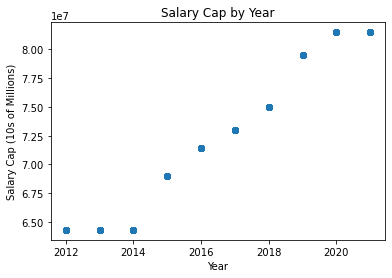

In [191]:
# Plot the change in Salary cap over the years in our data

plt.figure()
plt.scatter(nhl_data['year'], nhl_data['salary cap'])
plt.title('Salary Cap by Year')
plt.xlabel('Year')
plt.ylabel('Salary Cap (10s of Millions)')
plt.show()

##### Changing the Salary Values

Since the salary cap is not the same year over year, I will be using the salaries as a percentage of the total salary cap. These will be changed below.

In [193]:
# Create a loop to replace data with the percentages

for n in range(1,21):
    nhl_data[f'{n}'] = nhl_data[f'{n}']/nhl_data['salary cap']

In [194]:
# Check our dataframe
nhl_data.head()

,team,year,R1,R2,R3,R4,WC,1,2,3,...,12,13,14,15,16,17,18,19,20,salary cap
0,ARI,2012,1,1,1,0,0,0.081649,0.077760,0.070762,...,0.027994,0.027216,0.021773,0.020607,0.019440,0.017107,0.016330,0.013997,0.013997,64300000
1,ARI,2013,0,0,0,0,0,0.082426,0.081649,0.062208,...,0.027994,0.027216,0.020607,0.019440,0.017107,0.013997,0.013997,0.013271,0.013227,64300000
2,ARI,2014,0,0,0,0,0,0.088129,0.085537,0.085537,...,0.042768,0.039658,0.038880,0.018468,0.017885,0.013608,0.013530,0.013427,0.013271,64300000
3,ARI,2015,0,0,0,0,0,0.082126,0.079710,0.076812,...,0.017210,0.016667,0.016667,0.016184,0.013406,0.012959,0.012681,0.012512,0.012367,69000000
4,ARI,2016,0,0,0,0,0,0.079365,0.077031,0.074230,...,0.024510,0.016106,0.015640,0.014566,0.012955,0.012955,0.012955,0.012255,0.012255,71400000


### Distribution of Individual Salaries

Now that we have all years on the same scale, we want to look at how teams are spending their available salary cap by looking at the way salary cap is distributed accross a team payroll.

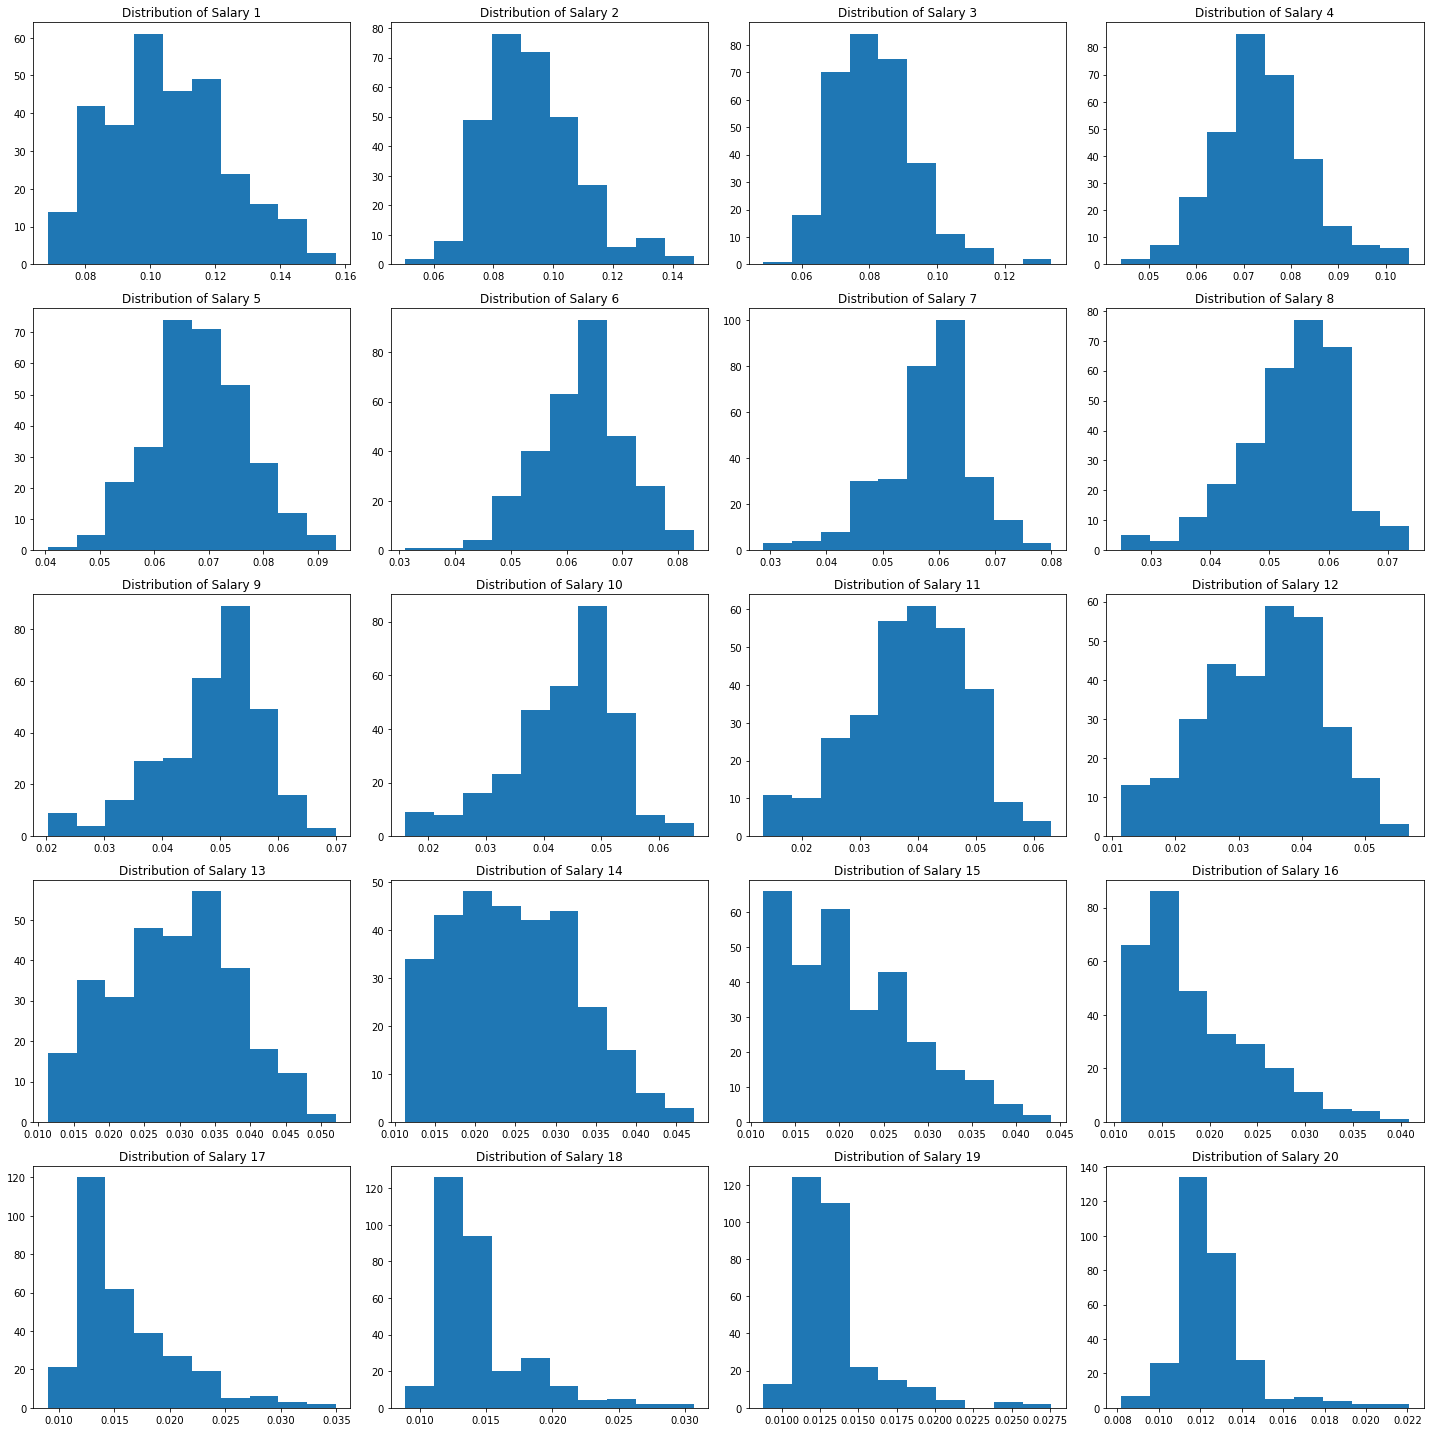

In [211]:
# creating our subplot
plt.subplots(5, 4, figsize=(20, 20))

#Plot the values
for i in range(1,21):
    plt.subplot(5,4,i)
    plt.hist(nhl_data[f'{i}'], bins=10)
    plt.title(f'Distribution of Salary {i}')
plt.tight_layout()
plt.show()

#### Distribution

From what we can see above, it is clear that most teams start to spend more heavily in the middle bins between the 4th and 12th highest paid players on their roster. As we get towards the lower end of the roster, teams tend to go for cheaper options, though the differences between maximum and minimum are as low as 2% in these players. 

It will be interesting to see how this will tie into the coefficients in our logistic regression model in the next interview. I have a hypothesis that the teams spending a higher percentage of salary cap on lower players make the later rounds of the playoffs.

### New Columns

Given that this report is more interested in where to spend salary cap overall, rather than individually, we will create 4 columns to represent each quarter of the roster.

In [199]:
# Create new Columns

nhl_data['Q1'] = nhl_data['1'] + nhl_data['2'] + nhl_data['3'] + nhl_data['4'] + nhl_data['5']
nhl_data['Q2'] = nhl_data['6'] + nhl_data['7'] + nhl_data['8'] + nhl_data['9'] + nhl_data['10']
nhl_data['Q3'] = nhl_data['11'] + nhl_data['12'] + nhl_data['13'] + nhl_data['14'] + nhl_data['15']
nhl_data['Q4'] = nhl_data['16'] + nhl_data['17'] + nhl_data['18'] + nhl_data['19'] + nhl_data['20']

In [212]:
# Check that this worked
nhl_data.head()

,team,year,R1,R2,R3,R4,WC,1,2,3,...,16,17,18,19,20,salary cap,Q1,Q2,Q3,Q4
0,ARI,2012,1,1,1,0,0,0.081649,0.077760,0.070762,...,0.019440,0.017107,0.016330,0.013997,0.013997,64300000,0.335148,0.195568,0.125583,0.080871
1,ARI,2013,0,0,0,0,0,0.082426,0.081649,0.062208,...,0.017107,0.013997,0.013997,0.013271,0.013227,64300000,0.339036,0.215008,0.124028,0.071599
2,ARI,2014,0,0,0,0,0,0.088129,0.085537,0.085537,...,0.017885,0.013608,0.013530,0.013427,0.013271,64300000,0.423276,0.285381,0.186042,0.071721
3,ARI,2015,0,0,0,0,0,0.082126,0.079710,0.076812,...,0.013406,0.012959,0.012681,0.012512,0.012367,69000000,0.384300,0.259420,0.102959,0.063925
4,ARI,2016,0,0,0,0,0,0.079365,0.077031,0.074230,...,0.012955,0.012955,0.012955,0.012255,0.012255,71400000,0.335668,0.228291,0.100000,0.063375


### Top Salaries of Successful Regular Season Teams

The first numbers to dive into are the top salaries of teams that make the playoffs (R1 = 1) compared to those that don't (R1 = 0). We do the same for teams that win the first round (R2 = 1), second round (R3 = 1), third round (R4 = 1), and winning the cup (WC = 1).

Text(0.5, 1.0, 'Distribution of Top Salary by Cup Finals Success')

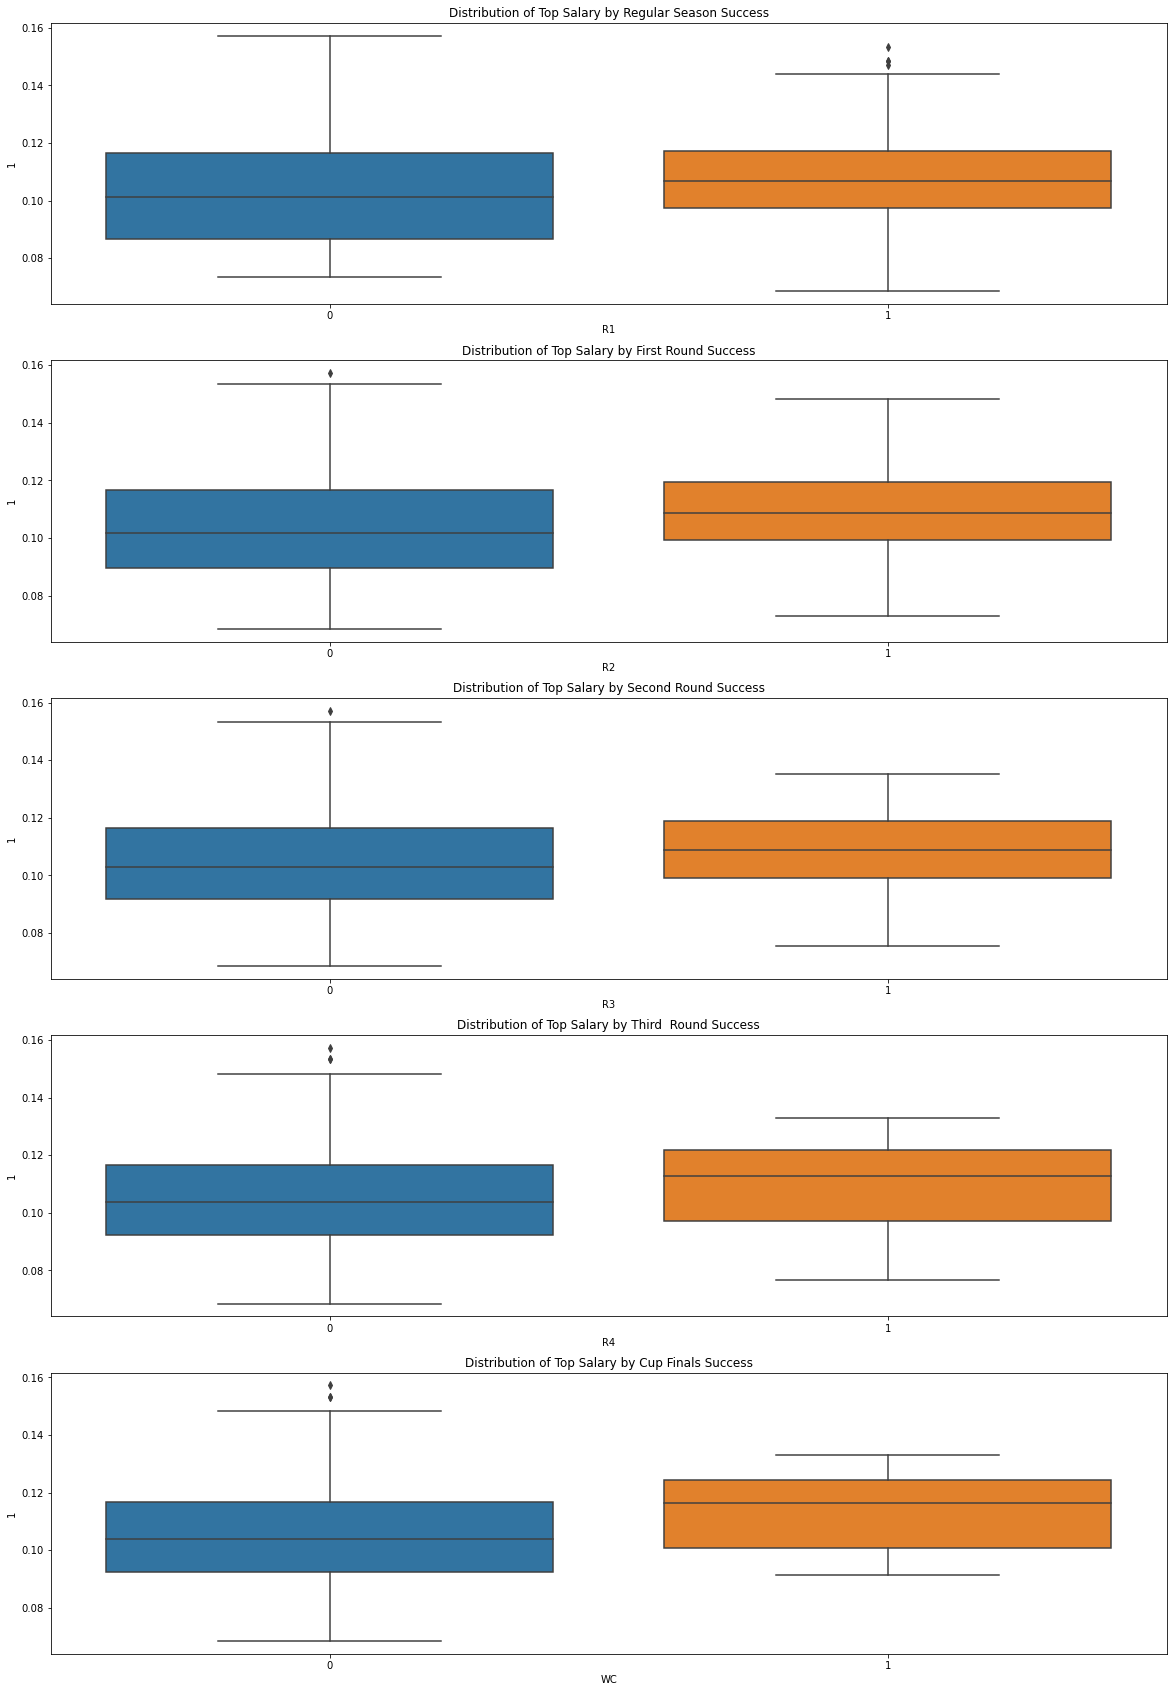

In [149]:
# Create Subplots for each round of the playoffs

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=1, nrows=5, sharey=True, figsize=(20,30))
sns.boxplot(x=nhl_data['R1'], y=nhl_data['1'], ax=ax1).set_title('Distribution of Top Salary by Regular Season Success')
sns.boxplot(x=nhl_data['R2'], y=nhl_data['1'], ax=ax2).set_title('Distribution of Top Salary by First Round Success')
sns.boxplot(x=nhl_data['R3'], y=nhl_data['1'], ax=ax3).set_title('Distribution of Top Salary by Second Round Success')
sns.boxplot(x=nhl_data['R4'], y=nhl_data['1'], ax=ax4).set_title('Distribution of Top Salary by Third  Round Success')
sns.boxplot(x=nhl_data['WC'], y=nhl_data['1'], ax=ax5).set_title('Distribution of Top Salary by Cup Finals Success')


We can see that through the boxplot above that teams who make the playoffs have a tighter distribution between the 1st and 3rd quartiles and a lower maximum than the teams that don't. This realization shows, at a very high level, that teams with top paid players in the ~10-14% of total salary cap range make the playoffs more often.

As the analysis moves through the playoffs, it is clear that the distribution of the top salary on successful teams becomes more centralized around the median, with lower maximums and higher minimums. This is quite notable, as it is apparent that teams that are more successful tend to have top players that make up around 9-14% of the total salary cap. 

### First Quartile of Players

It is clear that there is some pattern emerging about top paid players on each team and team success, but the differences do not give very strong insights, as there is no real applicable strategy involved with just signing your top player to a salary worth 9-14% of total salary cap.

Text(0.5, 1.0, 'Distribution of Top Salary by Cup Finals Success')

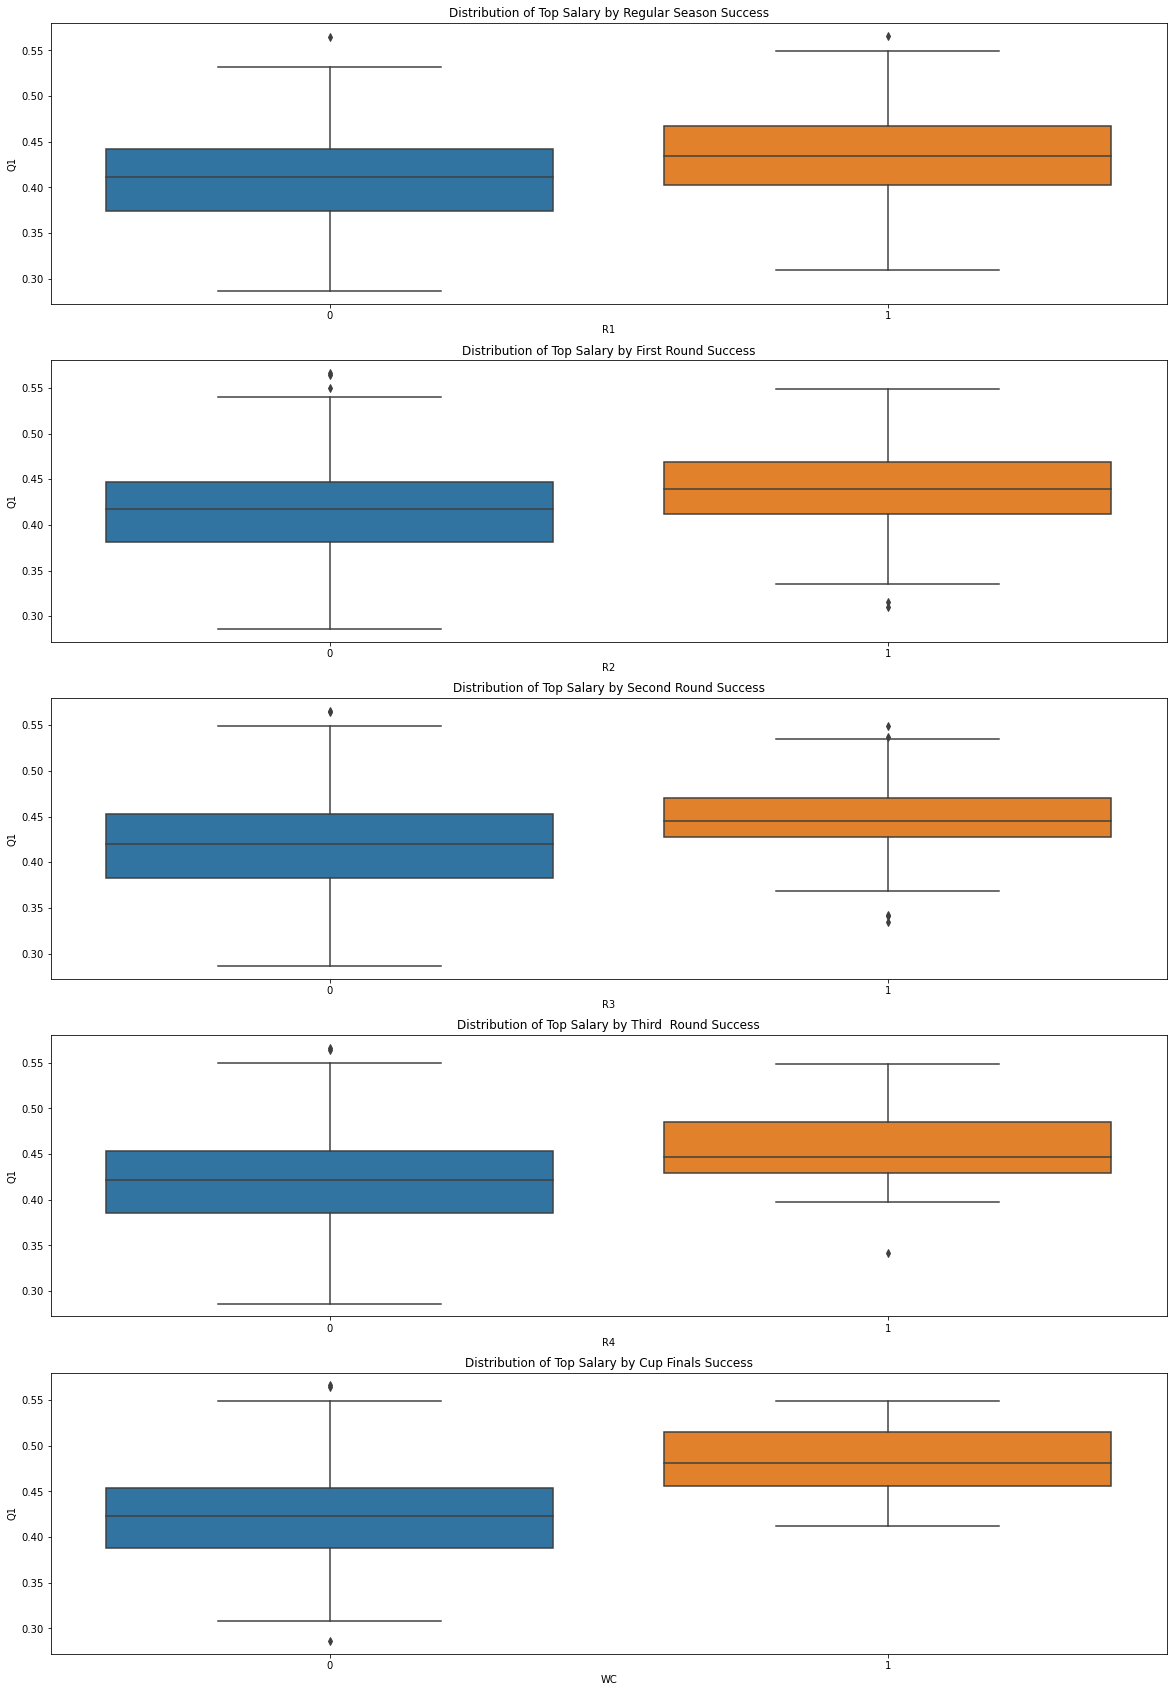

In [152]:
# Create Subplots for each round of the playoffs

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=1, nrows=5, sharey=True, figsize=(20,30))
sns.boxplot(x=nhl_data['R1'], y=nhl_data['Q1'], ax=ax1).set_title('Distribution of Top Salary by Regular Season Success')
sns.boxplot(x=nhl_data['R2'], y=nhl_data['Q1'], ax=ax2).set_title('Distribution of Top Salary by First Round Success')
sns.boxplot(x=nhl_data['R3'], y=nhl_data['Q1'], ax=ax3).set_title('Distribution of Top Salary by Second Round Success')
sns.boxplot(x=nhl_data['R4'], y=nhl_data['Q1'], ax=ax4).set_title('Distribution of Top Salary by Third  Round Success')
sns.boxplot(x=nhl_data['WC'], y=nhl_data['Q1'], ax=ax5).set_title('Distribution of Top Salary by Cup Finals Success')

The boxplots for the first quartile of salaries seem to give a better picture of which factors can be assumed to have a large effect on the success of teams in this dataset. These plots begin to give us indication that there will be a pattern in our modelling for predicting team success, but only after the second round. The difference in distribution is more noteworthy for individual players in round in rounds 1 and 2. We will use individual players for our modelling.

In [201]:
# Save new data as a csv

nhl_data.to_csv('nhl_data_modelling.csv', index=False)

## Conclusion

In this notebook, we looked into how salaries are distributed across team payrolls as a whole and explored how top player salaries differ for teams that make the playoffs and teams that have "Playoff Success". 

We can also see that there is an opportunity to explore how the quartiles of salary cap spend changes the chances of a team's success as they progress to the later rounds of the playoffs


We can now begin modelling in the next notebook: <b> Book4 - Modelling and Conclusions </b>